<a href="https://colab.research.google.com/github/Shourya306/EDA-Analaysis/blob/main/Copy_of_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [151]:
# Importing all the relevent libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import date

In [152]:
pd.set_option('display.max_columns', None)     # This code is used to make pandas display all the columns in the dateset.

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
# Reading in the dataset.
file_path = '/content/drive/MyDrive/Colab Notebooks/Module 1/M1 - Capstone project/Copy of Global Terrorism Data.csv'
# Encoded with "latin-1" because the default encoding wasn't able to encode the large file. 
full_df = pd.read_csv(file_path, encoding = 'latin-1', low_memory = False)  

I have divided the **EDA** into 2 parts:
  
  * Part 1 = **Data Cleaning**

              1. Feature Selection.
              2. Dealing with null values.
  * Part 2 = **Data Analysis**

              1. Preliminary Analysis.
              2. Comparison of Indian and Iraq Terrorism.

So let's begin with **Data Cleaning**

In [155]:
full_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [156]:
full_df.shape

(181691, 135)

In [157]:
# Finding out the percentage of null values in an example column.
null_values_weaptype2_txt = full_df[full_df['weaptype2_txt'].isnull()]
Percentage_null_values_weaptype2_txt = (len(null_values_weaptype2_txt['weaptype2_txt']) / len(full_df['weaptype2_txt'])) * 100
round(Percentage_null_values_weaptype2_txt,2)

92.78

* There are **135 columns** in the dateset and it dosen't have sense to analyse all the features of the dateset because:

    1.Most of the features/columns in the dataset contain the same 
    information as the other columns (e.g weaptype1_txt & weaptype2_txt).

    2.And also these columns(not relevent columns) contain a lot of 
    null information (e.g weaptype2_txt contains 93% percent null values.

* So I will subset the above dateset with only those columns that
satisfy the above 2 conditions.

In [158]:
# Subsetting the dataset.
subset_df = full_df[['iyear','imonth','iday','extended','country_txt','region_txt','city','latitude','longitude','success','suicide','attacktype1_txt',
                'targtype1_txt','gname','motive','weaptype1_txt','nkill','nwound']]

In [159]:
subset_df.shape

(181691, 18)

In [160]:
# Making a copy of the subseted dataframe and working only on the copy of the subseted dataframe.
df = subset_df.copy()

In [161]:
# Now it's time to rename the columns to make it more intuitive as to what the columns represent.
df.rename(columns = {'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region','attacktype1_txt':'attack_type',
                            'targtype1_txt':'target','gname':'organisation','weaptype1_txt':'weapon_type','nkill':'killed','nwound':'wounded'},
                 inplace = True)

In [162]:
df.info()   #This is used to check the data type of the columns before performing any operations on them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          181691 non-null  int64  
 1   month         181691 non-null  int64  
 2   day           181691 non-null  int64  
 3   extended      181691 non-null  int64  
 4   country       181691 non-null  object 
 5   region        181691 non-null  object 
 6   city          181257 non-null  object 
 7   latitude      177135 non-null  float64
 8   longitude     177134 non-null  float64
 9   success       181691 non-null  int64  
 10  suicide       181691 non-null  int64  
 11  attack_type   181691 non-null  object 
 12  target        181691 non-null  object 
 13  organisation  181691 non-null  object 
 14  motive        50561 non-null   object 
 15  weapon_type   181691 non-null  object 
 16  killed        171378 non-null  float64
 17  wounded       165380 non-null  float64
dtypes: f

In [163]:
df.head()

,year,month,day,extended,country,region,city,latitude,longitude,success,suicide,attack_type,target,organisation,motive,weapon_type,killed,wounded
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0
1,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0
3,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN


Before we proceed any further lets understand what each of the columns means.
  * year = The year in which attack has taken place.
  * month = The month(represented in numbers) in which the attack has taken   place.
  * day = The day in which the attack has taken place.
  * extended = If the attack has extended for more than one day then value 1 is assigned and if it isn't then value 0 is assigned.
  * country = The country in which the incident took place.
  * city = The city in which the incident took place.
  * latitude = This feild represents the latitude.
  * longitude = This feild represents the longitude.
  * success = This feild informs us whether the attack was a success or a failure(0 = failure, 1 = Success).
  * suicide = This feild informs us whether the attack was carried out as a  suicide mission or not
  (0 = not suicide mission, 1. = suicide mission)
  * attack_type = The type of attack.
  * target = The type of target/victim.
  * organisation = Terrorist Organisation that has claimed the attack.
  * motive = The motive behind the attack.
  * weapon_type = The type of weapon used in the attack.
  * killed = The number of people killed in that attack.
  * wounded = The number of people wounded in that attack.

In [165]:
# I will be dropping the latitude and longitude columns because I won't be needing them.
df.drop(['latitude','longitude'],axis = 1,inplace = True)

In [166]:
df.shape

(181691, 16)

Now lets deal with **null values**

I have replaced the motive column null values with unknown.

and also I have replaced the city column null values with unknown.

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          181691 non-null  int64  
 1   month         181691 non-null  int64  
 2   day           181691 non-null  int64  
 3   extended      181691 non-null  int64  
 4   country       181691 non-null  object 
 5   region        181691 non-null  object 
 6   city          181257 non-null  object 
 7   success       181691 non-null  int64  
 8   suicide       181691 non-null  int64  
 9   attack_type   181691 non-null  object 
 10  target        181691 non-null  object 
 11  organisation  181691 non-null  object 
 12  motive        50561 non-null   object 
 13  weapon_type   181691 non-null  object 
 14  killed        171378 non-null  float64
 15  wounded       165380 non-null  float64
dtypes: float64(2), int64(6), object(8)
memory usage: 22.2+ MB


**Approach used for dealing with null values -** There are 4 columns which have null values viz. **motive**,**killed**,**wounded**,**city**.

I won't be using dropna method because most of my data will be lost if i remove all the rows that contain null values because of the **motive** column(only 28 percent of the data will remain).

Since there are lot of **unknown** in the dataset for motives I will replace them with unknown.

Also, The **city** column in the dataset has a few null values and i will replace them **unknown**.



In [169]:
df['motive'].value_counts()

Unknown                                                                                                                                                                                                                                                                                                                                                                  14889
The specific motive for the attack is unknown.                                                                                                                                                                                                                                                                                                                           14430
The specific motive is unknown; however, sources noted that the attack may have been part of a larger trend of violence related to Bangladesh's nationwide hartal, which began on January 6, 2015.                                                                        

In [170]:
df['city'].value_counts()

Unknown      9775
Baghdad      7589
Karachi      2652
Lima         2359
Mosul        2265
             ... 
Hotwag          1
Ostend          1
Balughata       1
Jikoyi          1
Kubentog        1
Name: city, Length: 36674, dtype: int64

In [171]:
df['motive'].fillna('Unknown',inplace = True)
df['city'].fillna('Unknown',inplace = True)

In [172]:
# Checking if there are any null values in motive and city column
df[df['motive'].isnull()]['motive'].count()

0

In [173]:
df[df['city'].isnull()]['city'].count()

0

Dealing with null values which are present in the **killed** and **wounded** columns.

I will replace the null values of **killed** and **wounded** with their means.

I have chosen mean over median because there aren't many outliers in these columns which you will get to see in the **Box Plot** below.  

In [174]:
# Replacing the null values of killed.
df.loc[df['killed'].isna(),'killed'] = df.loc[~df['killed'].isna(),'killed'].mean()

In [175]:
df['killed'].describe()     # The null values will be replaced 2.403272.

count    181691.000000
mean          2.403272
std          11.213277
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max        1570.000000
Name: killed, dtype: float64

In [176]:
df.head()

,year,month,day,extended,country,region,city,success,suicide,attack_type,target,organisation,motive,weapon_type,killed,wounded
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,Unknown,1.000000,0.0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,Unknown,0.000000,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,Unknown,1.000000,0.0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Unknown,Explosives,2.403272,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Unknown,Incendiary,2.403272,NaN


In [177]:
# Replacing the null values of wounded.
df.loc[df['wounded'].isna(),'wounded'] = df.loc[~df['wounded'].isna(),'wounded'].mean()

In [178]:
df['wounded'].describe()    # The null values will be replaced by 3.167668.

count    181691.000000
mean          3.167668
std          34.297796
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max        8191.000000
Name: wounded, dtype: float64

In [179]:
df.head()

,year,month,day,extended,country,region,city,success,suicide,attack_type,target,organisation,motive,weapon_type,killed,wounded
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,Unknown,1.000000,0.000000
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,Unknown,0.000000,0.000000
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,Unknown,1.000000,0.000000
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Unknown,Explosives,2.403272,3.167668
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Unknown,Incendiary,2.403272,3.167668


Now, Let's move onto the interesting part i.e, the **Data Analysis** part.

# Preliminary analysis

In [180]:
df.head()

,year,month,day,extended,country,region,city,success,suicide,attack_type,target,organisation,motive,weapon_type,killed,wounded
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,Unknown,1.000000,0.000000
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,Unknown,0.000000,0.000000
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,Unknown,1.000000,0.000000
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Unknown,Explosives,2.403272,3.167668
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Unknown,Incendiary,2.403272,3.167668


## The most successful terroist organisations. 

My Hypotesis - The most successful terrorist organisation is **Taliban** 

In [181]:
# Most successful terroist organisations.
no_unknown_organisations = df[df['organisation'] != 'Unknown']
most_succesful_organisations = no_unknown_organisations.groupby('organisation').agg({'success':'sum'}).rename(columns = {'success':'succesful attacks'}).sort_values('succesful attacks', ascending = False).head(5)

In [182]:
most_succesful_organisations

,succesful attacks
organisation,
Taliban,6680
Islamic State of Iraq and the Levant (ISIL),4759
Shining Path (SL),4337
Farabundo Marti National Liberation Front (FMLN),3317
Al-Shabaab,3016


In [183]:
# The input data for a pie chart must be an array.
data = np.array([6680,4759,4337,3317,3016])
terror_org = np.array(['Taliban','Islamic State of Iraq and the Levant (ISIL)','Shining Path (SL)','Farabundo Marti National Liberation Front (FMLN)',
                   'Al-Shabaab'])
myexplode = [0.2,0,0,0,0]

([<matplotlib.patches.Wedge at 0x7f1756da3550>,
 [Text(0.7570348636056958, 1.0568340528604792, 'Taliban'),
  Text(-0.9278903735168371, 0.590778685071478, 'Islamic State of Iraq and the Levant (ISIL)'),
  Text(-0.8229550320745564, -0.7298938382964786, 'Shining Path (SL)'),
  Text(0.2639768800951863, -1.0678558923259316, 'Farabundo Marti National Liberation Front (FMLN)'),
  Text(1.0005214389119115, -0.4571179828858612, 'Al-Shabaab')])

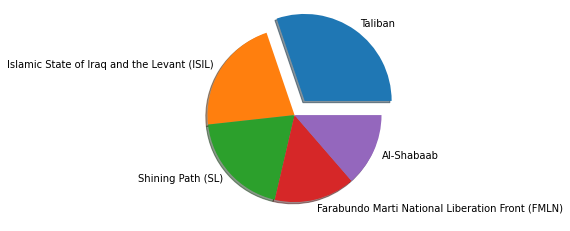

In [184]:
# Ploting a Pie chart.
plt.pie(data, labels = terror_org, explode = myexplode, shadow = True)

**My Hypotesis is True!**

**Taliban is the most successful organisation, but ISIL is not far behind.**

## Let's check how intimate the variables are against other variables.

In [185]:
# This can be done by ploting a correlation heat map.
corr = df.corr()

<Figure size 720x720 with 0 Axes>

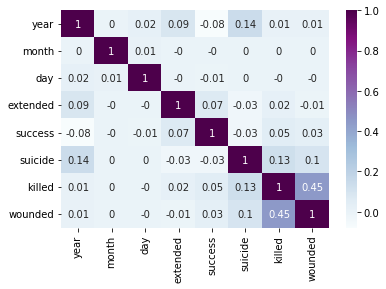

<Figure size 720x720 with 0 Axes>

In [188]:
# Ploting the correlation in the form of a heatmap.
sns.heatmap(np.round(corr,2), annot = True,cmap = 'BuPu') 
plt.figure(figsize=(10,10))

**From the above heatmap we can conclude that variables killed and wounded are tad related to eachother as their correlation coeffient is 0.45**.

**Correlation analysis is usually done to see what variables are closely related to eachother and in data cleaning case, dropping those variables that are closely related with eachother**.

Understanding the relationship using the scatter plot.

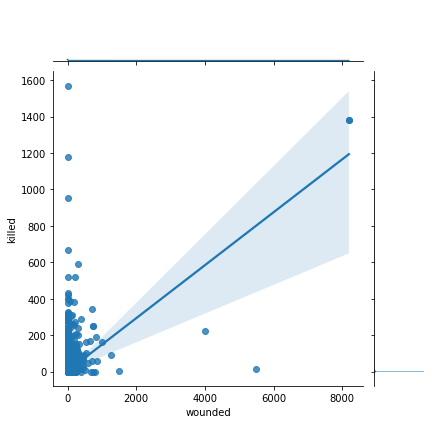

In [190]:
sns.jointplot(x = 'wounded', y = 'killed', data = df,kind = 'reg')

**We can see that the relation between wounded and killed is a positively correlated one, meaning with the increase in wounds the kills also increase**.

**There are a few outliers but most of the distribution is with the range 0 to 400 for killed and 0 to approx.1000 for wounded**

## In which year the most number of attacks took place.

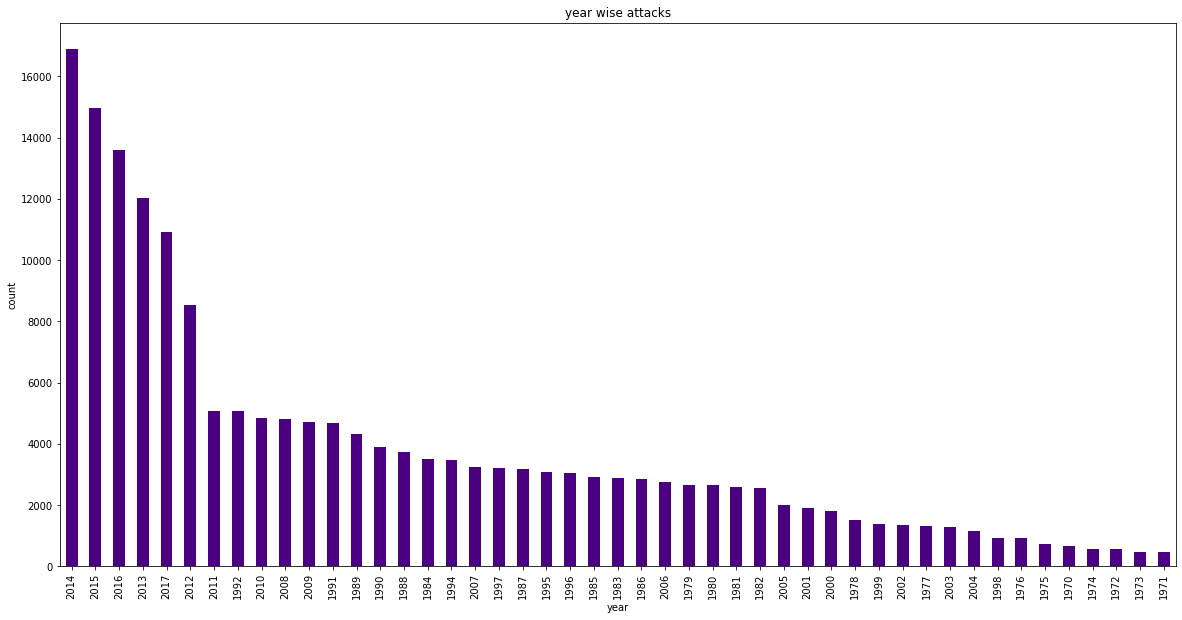

In [193]:
# Ploting a bar chart 
attacks_year_wise = df['year'].value_counts()
attacks_year_wise.plot(kind = 'bar',color = 'Indigo')
plt.title('year wise attacks')
plt.xlabel('year')
plt.ylabel('count')
plt.rcParams['figure.figsize'] = (15, 10)

 **The most number of attacks took place in the year 2014.**


## In which month the most number of attacks took place.

My Hypotesis - Attacks will take place usually in the festive season.

Text(0.5, 1.0, 'Month wise attacks')

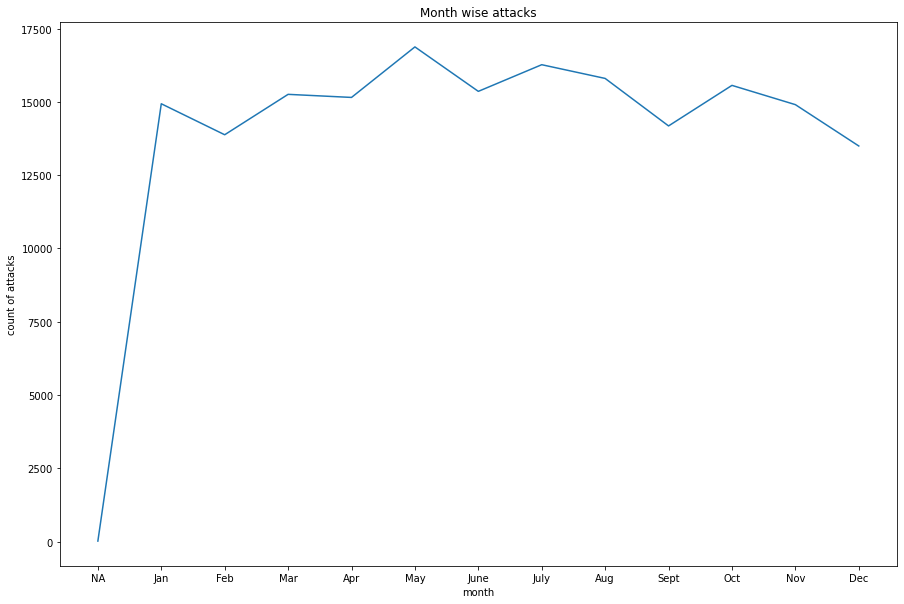

In [194]:
# Plotting a line graph to check if my hypotesis is true or false.
df.groupby('month')['day'].count().plot()
x = [0,1,2,3,4,5,6,7,8,9,10,11,12]
labels = ['NA','Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
plt.xticks(x, labels)                 # Using the ticks function to rename x-axis values as months from numbers
plt.ylabel('count of attacks')
plt.title('Month wise attacks')

**From the above line graph we can say that my hypothesis is false. The number of attacks are constant through out the year.**

Here NA represents the number of attacks for which the month in the dataset is not mentioned.

## In which country the most number of attacks has taken place.

My Hypotesis - It must be Syria(I hear all the time in the news regarding the terror attacks that took place in syria).

In [195]:
# Top 10 most terrorized countries
most_terrorized_country = df.groupby('country',as_index = True).agg({'day':'count'}).rename(columns = {'day':'no of attacks'}).sort_values('no of attacks',ascending = False).head(10)

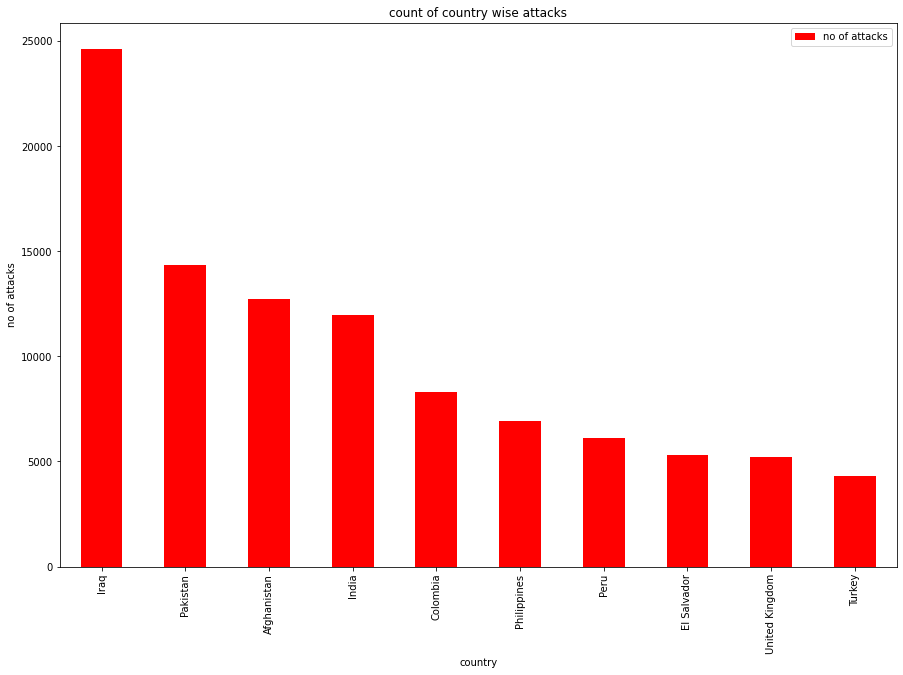

In [196]:
# Ploting a bar chart
most_terrorized_country.plot(kind = 'bar', color = 'red')
plt.title('count of country wise attacks')
plt.xlabel('country')
plt.ylabel('no of attacks')
plt.rcParams['figure.figsize'] = (20, 5)

**My hypotesis is wrong again, Iraq is the most terrorized country.**

## let us see the distribution of killed and wounded grouped by countries using a **Box Plot**

In [197]:
# Total killed and wounded as per the countires.
top_killed_wounded_distribution = df.groupby('country').agg({'killed':'sum','wounded':'sum'}).sort_values(['killed','wounded'],ascending = [False,False]).head(10)

Text(0, 0.5, 'sum of killings and wounded')

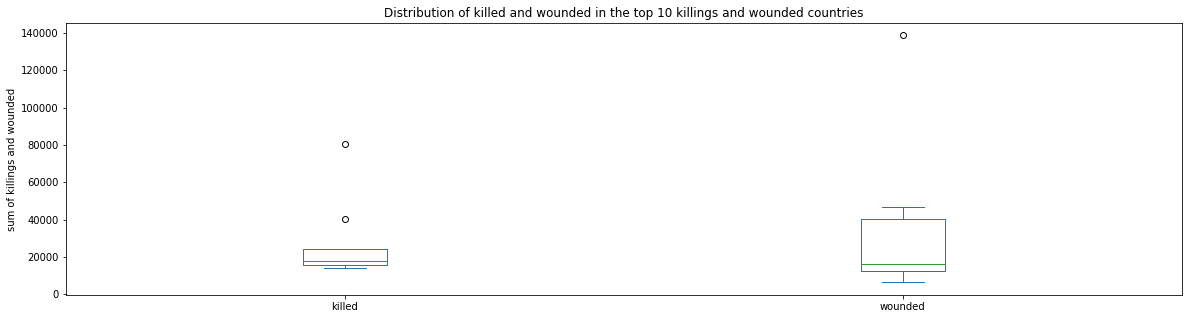

In [198]:
# Ploting a Bar Chart.
top_killed_wounded_distribution.plot(kind = 'box')
plt.title('Distribution of killed and wounded in the top 10 killings and wounded countries')
plt.ylabel('sum of killings and wounded')

**The median for both the killed and wounded are the same and also the killed column has 2 outliers but the wounded has only one outlier.**

**The one outlier in the wounded colum is far from the median of wounded column whereas the outliers of the killed column are relatively much closer to the median of the killed.**

## Terrorist Attacks by Region

My Hypotesis - Middle East and North Africa region probably might have the most number of terror attacks

Text(0, 0.5, 'Number of Attacks')

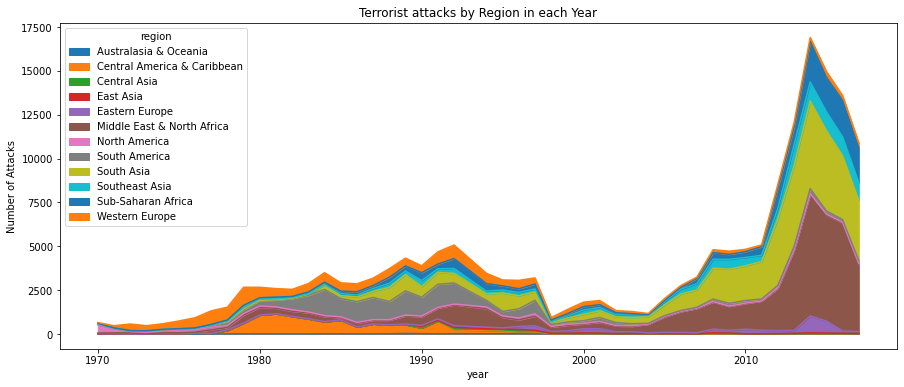

In [199]:
# Plotting terror attacks as per the region
pd.crosstab(df.year, df.region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist attacks by Region in each Year')
plt.ylabel('Number of Attacks')

**Yayy!! my Hypotesis is sort of true**.

**From the above area chart/graph we can see that middle east and north africa have to most number of terror attacks**.


# In-Deapth analysis of Terorrism in Iraq, the country with the most number of attacks, and Terrorism in India.

In [201]:
# Subsetting the dataframe with Iraq and India as countries.
iraq_df = df[df['country'] == 'Iraq']
india_df = df[df['country'] == 'India']

My Hypothesis - Srinager is the most jeopardized in India.

In [207]:
# Subseting a dataframe without city values being equal to Unknown.
india_city_no_unknown = df[(df['country'] == 'India') & (df['city'] != 'Unknown')]
iraq_city_no_unknown = df[(df['country'] == 'Iraq') & (df['city'] != 'Unknown')]

In [208]:
india_city_no_unknown.head()

,year,month,day,extended,country,region,city,success,suicide,attack_type,target,organisation,motive,weapon_type,killed,wounded
1186,1972,2,22,0,India,South Asia,New Delhi,1,0,Hijacking,Airports & Aircraft,Palestinians,Unknown,Explosives,0.0,0.0
2764,1975,1,2,0,India,South Asia,Samastipur,1,0,Bombing/Explosion,Government (General),Ananda Marga,Unknown,Explosives,4.0,0.0
3857,1976,5,26,0,India,South Asia,New Delhi,1,0,Bombing/Explosion,Airports & Aircraft,Unknown,Unknown,Explosives,0.0,0.0
5327,1977,9,28,0,India,South Asia,Bombay,1,0,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Unknown,Firearms,0.0,0.0
7342,1979,1,14,0,India,South Asia,Imphal,1,0,Assassination,Government (General),Unknown,Unknown,Firearms,3.0,0.0


In [209]:
iraq_city_no_unknown.head()

,year,month,day,extended,country,region,city,success,suicide,attack_type,target,organisation,motive,weapon_type,killed,wounded
2854,1975,3,1,0,Iraq,Middle East & North Africa,Mosul,1,0,Hijacking,Airports & Aircraft,Unknown,Unknown,Unknown,0.0,1.0
4385,1976,12,15,0,Iraq,Middle East & North Africa,Baghdad,1,0,Bombing/Explosion,Airports & Aircraft,Unknown,Unknown,Explosives,10.0,285.0
4393,1976,12,18,1,Iraq,Middle East & North Africa,Penjwon,1,0,Hostage Taking (Kidnapping),Government (General),Kurdish Democratic Party-Iraq (KDP),Unknown,Unknown,0.0,0.0
4402,1976,12,24,0,Iraq,Middle East & North Africa,Baghdad,1,0,Assassination,Violent Political Party,Unknown,Unknown,Firearms,2.0,0.0
8688,1979,6,15,0,Iraq,Middle East & North Africa,Basra,1,0,Assassination,Government (General),Unknown,Unknown,Unknown,1.0,0.0


In [210]:
# Top 5 Iraq and India cities that were attacked the most.
iraq_top_targetted_cities = iraq_city_no_unknown.groupby('city').agg({'day':'count'}).rename(columns = {'day':'attacks'}).sort_values('attacks',ascending = False).head(5)
india_top_targetted_cities = india_city_no_unknown.groupby('city').agg({'day':'count'}).rename(columns = {'day':'attacks'}).sort_values('attacks',ascending = False).head(5)

In [211]:
# Concadinating both the dataframes so that I can make an easy comparison among those two countries.
india_iraq_df = pd.concat([india_top_targetted_cities,iraq_top_targetted_cities],axis = 1)

Text(0, 0.5, 'total number of attacks')

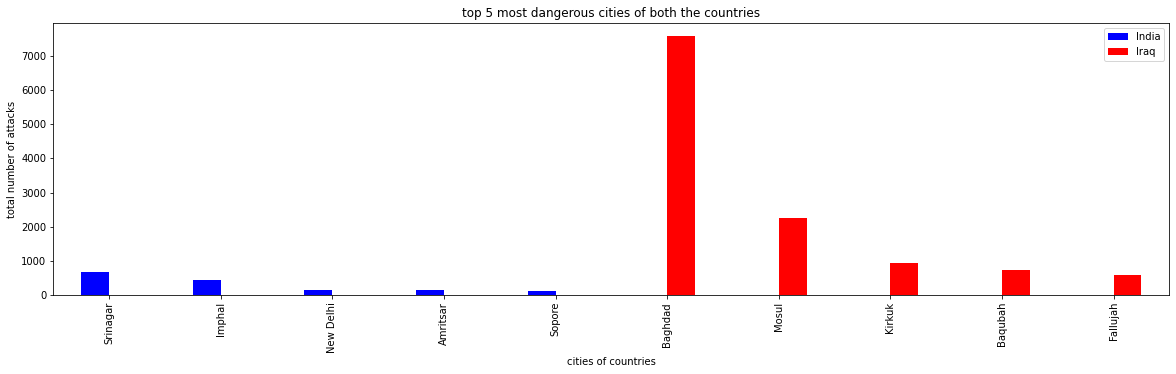

In [212]:
# Ploting them in a Basic Bar Graph.
india_iraq_df.plot(kind = 'bar',color = ['Blue','Red'])
plt.legend(['India','Iraq'])
plt.title('top 5 most dangerous cities of both the countries')
plt.xlabel('cities of countries')
plt.ylabel('total number of attacks')


**My Hypothesis is True**.

**The amount of threat faced by Iraq is way more than the threat faced by india**.

**All the top 5 cities in Iraq face more threat then all the top 5 cities in India**.

**From this analysis we can safely conclude that India counters terror better than Iraq**.

## The type of attack that took place.

In [213]:
india_df.head()

,year,month,day,extended,country,region,city,success,suicide,attack_type,target,organisation,motive,weapon_type,killed,wounded
1186,1972,2,22,0,India,South Asia,New Delhi,1,0,Hijacking,Airports & Aircraft,Palestinians,Unknown,Explosives,0.000000,0.000000
2764,1975,1,2,0,India,South Asia,Samastipur,1,0,Bombing/Explosion,Government (General),Ananda Marga,Unknown,Explosives,4.000000,0.000000
3857,1976,5,26,0,India,South Asia,New Delhi,1,0,Bombing/Explosion,Airports & Aircraft,Unknown,Unknown,Explosives,0.000000,0.000000
5327,1977,9,28,0,India,South Asia,Bombay,1,0,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Unknown,Firearms,0.000000,0.000000
7337,1979,1,13,0,India,South Asia,Unknown,1,0,Armed Assault,Police,Naga People,Unknown,Firearms,2.403272,3.167668


In [214]:
# Code for finding out the most common attack type used.
india_attack_type = india_df.groupby('attack_type').agg({'day':'count'}).rename(columns = {'day':'count of attack type'}).sort_values('count of attack type',ascending = False).head(3)
iraq_attack_type = iraq_df.groupby('attack_type').agg({'day':'count'}).rename(columns = {'day':'count of attack type'}).sort_values('count of attack type',ascending = False).head(3)

In [215]:
# Concadinating both countries attack types.
india_iraq_attack_type = pd.concat([india_attack_type,iraq_attack_type], axis = 1)

Text(0, 0.5, 'Count of attack type')

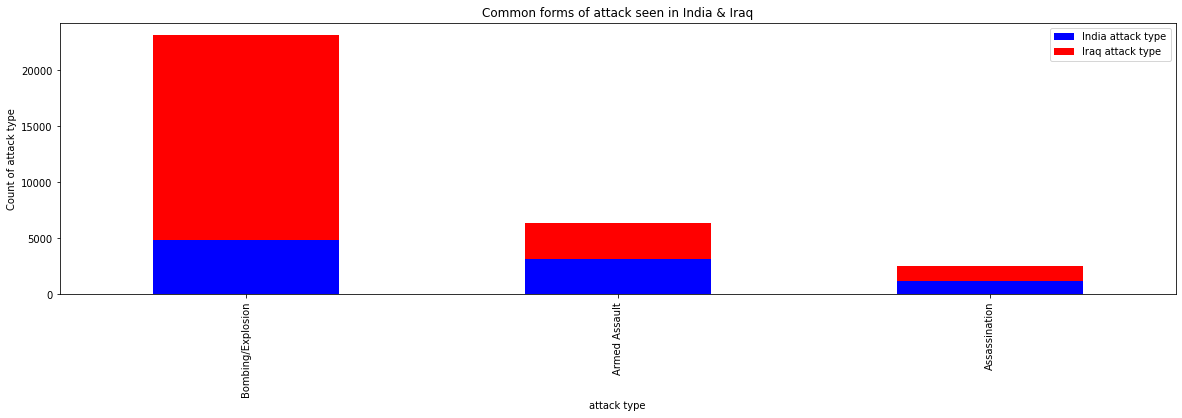

In [216]:
# Stacked Bar Plot.
india_iraq_attack_type.plot(kind = 'bar', stacked = True, color = ['Blue','Red'])
plt.legend(['India attack type','Iraq attack type'])
plt.title('Common forms of attack seen in India & Iraq')
plt.xlabel('attack type')
plt.ylabel('Count of attack type')

**Bombing/Explosion is used the most in both the countries as a form attack**.

**Armed Assault and Assassination is equally being used as a form of attack in both the nations**.

## Name the Terror organisations and what they target the most in both the countries.


In [218]:
# Subsetting the dataset without the Unknown values.
india_no_na_org = india_df[india_df['organisation'] != 'Unknown']
iraq_no_na_org = iraq_df[iraq_df['organisation'] != 'Unknown']

In [219]:
iraq_target = iraq_no_na_org.groupby(['organisation','target'],as_index = True).agg({'day':'count'}).rename(columns = {'day':'times targeted'}).sort_values('times targeted', ascending = False).head(5)
india_target = india_no_na_org.groupby(['organisation','target'], as_index = True).agg({'day':'count'}).rename(columns = {'day':'times targeted'}).sort_values('times targeted', ascending = False).head(5)

In [220]:
# Concatinating both the dataframes
india_iraq_target = pd.concat([india_target,iraq_target],axis = 1)

Text(0, 0.5, 'Times Attacked')

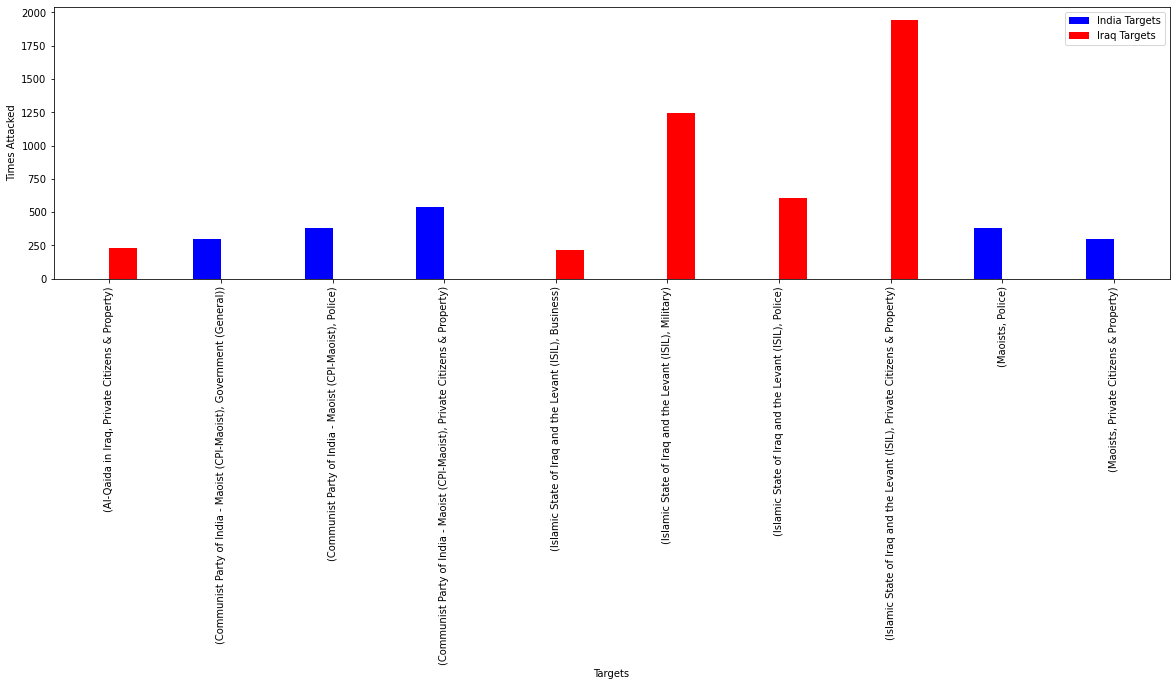

In [221]:
# Ploting a Graph.
india_iraq_target.plot(kind = 'bar', color = ['Blue','Red'])
plt.legend(['India Targets','Iraq Targets'])
plt.xlabel('Targets')
plt.ylabel('Times Attacked')

**The main diffrence between India and Iraq is -**

**In India, Maoists target various groups of societies like Police, Government etc..**.

**In Iraq, Al-Qaida,ISIL terrorist organisations target groups of societies like Citizens, Business, etc..**.

## **Insights Derived from analysing the data**.

* *Taliban is the most successful terrorist organisation.*
* *Killed and Wounded are the only 2 features that have some form of influence among each other and the relationship is a positive one.*
* *The most number of attacks took place in the year 2014.*
* *Terorist attacks take place through out all the months of a year.*
* *A large portion of terror attacks took place in Iraq.*
* *The medians of killed and wounded are approximately the same, but the distribution of both vary.*
* *The most attacked region is middle-east and north africa.*
* *Conclusions from analysing Indian terrorism and Iraq Terrorism-*
    1. *All the cities in India counter terrorism better than all the cities in Iraq.*
    2. *The forms of attacks used in both the countries is similar.*
    3. *In India only one terror organization target the groups of societies whereas in Iraq 2 terror organizations target the groups of societies.*